# U.S. Medical Insurance Costs

# Question we will attempt to answere

- Do smokers pay more for insurance
- Do men and women pay the same for insurance
- Do insurance costs differ by region.
- Do insurance costs increase with age

## Import libraries and define helper funtions

In [1]:
from statistics import mean,median, quantiles
import csv
import operator
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def transform_data(data):
    keys = data[0].keys()
    out = {key:[] for key in keys}
    for record in data:
        for key in keys:
            item = record[key]
            try:
                item = float(item)
            except:
                pass
            out[key].append(item)
    return out

def load_data(filename='insurance.csv'):
    with open(filename, newline='') as insurance_data_csv:
        csv_reader = csv.DictReader(insurance_data_csv)
        data = [row for row in csv_reader]
    return data

In [3]:
data = load_data()
dataT = transform_data(data)

## Do smokers pay more for insurance than none smokers
#### Separate out the insurance costs for smokers and none smokers

In [4]:
smokers = []
none_smokers = []
for charge, smoker in zip(dataT['charges'], dataT['smoker']):
    if smoker == 'yes':
        smokers.append(float(charge))
    elif smoker == 'no':
        none_smokers.append(float(charge))

### Plot the data
It can be seen from the box plots below that the mean insurance costs for smokers is approximately 4 times that as for none smokers.
It seems reasonable to conclude from this data that in general smokers do pay more for medical insurance than non smokers.

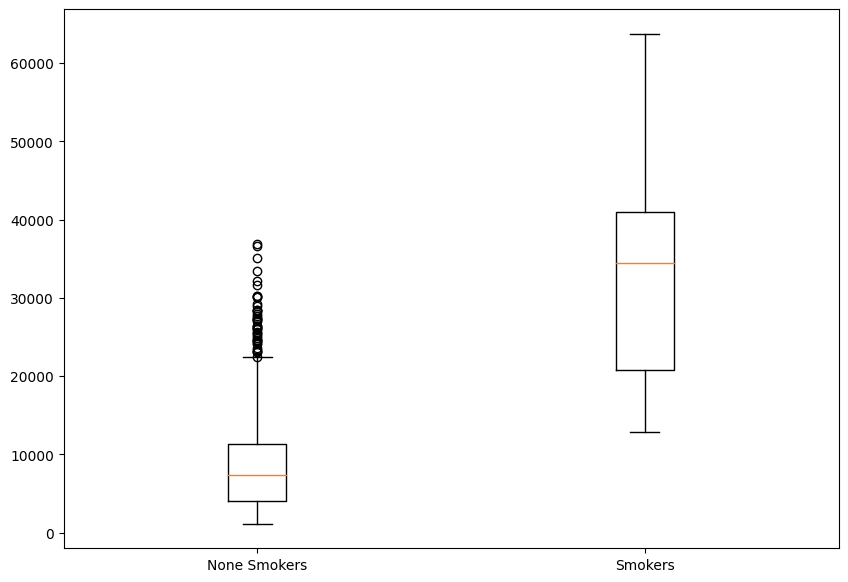

In [5]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot([none_smokers, smokers])
_ = ax.set_xticklabels(['None Smokers', 'Smokers'])

## Do men and women pay the same for insurance

In [6]:
men = []
women = []
for charge, sex in zip(dataT['charges'], dataT['sex']):
    if sex == 'male':
        men.append(float(charge))
    elif sex == 'female':
        women.append(float(charge))

### The results
A visual comparison of the two box plots below would indicate that medical cost for men and women are similar.
The medians of both sets of data are very similar at 9370 and 9413 respectively.
There are some differences though. The upper quartile and the upper tail of the mens data is quite a bit higher than that of the womens.

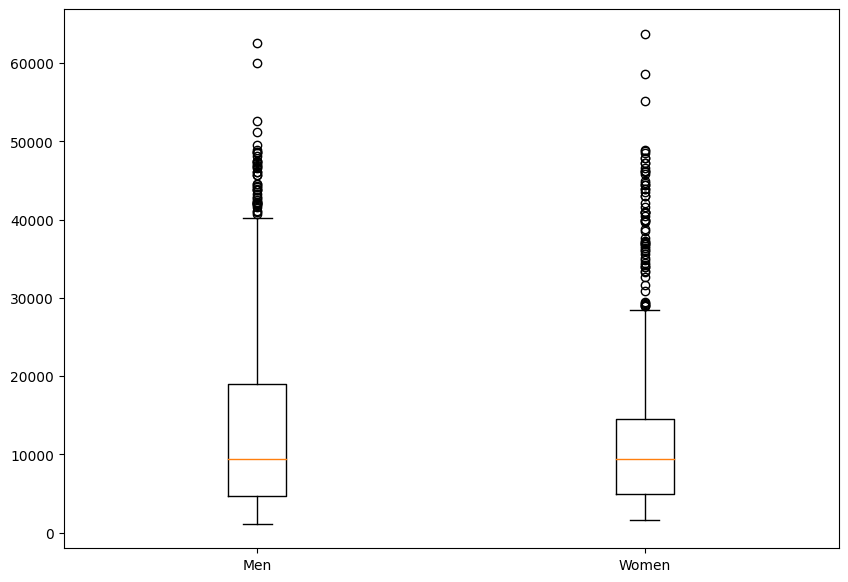

In [7]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot([men, women])
_ = ax.set_xticklabels(['Men', 'Women'])

## Do insurance costs differ by region

In [8]:
dataT.keys()

dict_keys(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

In [9]:
regions = list(set(dataT['region']))
regions

['southeast', 'northwest', 'northeast', 'southwest']

In [10]:
region_dict = {region: [] for region in regions}
for rec in data:
    region_dict[rec['region']].append(float(rec['charges']))

In [11]:
charges_by_region = [region_dict[region] for region in regions]

### Results
Visual inspection of the box plots for the four regions suggest that the insurance charges for the regions is broadly equal. There is some variation but this could be due to the insuficient samples for the regions. So with more data it is possible that the comparison across regions could be even more similar.

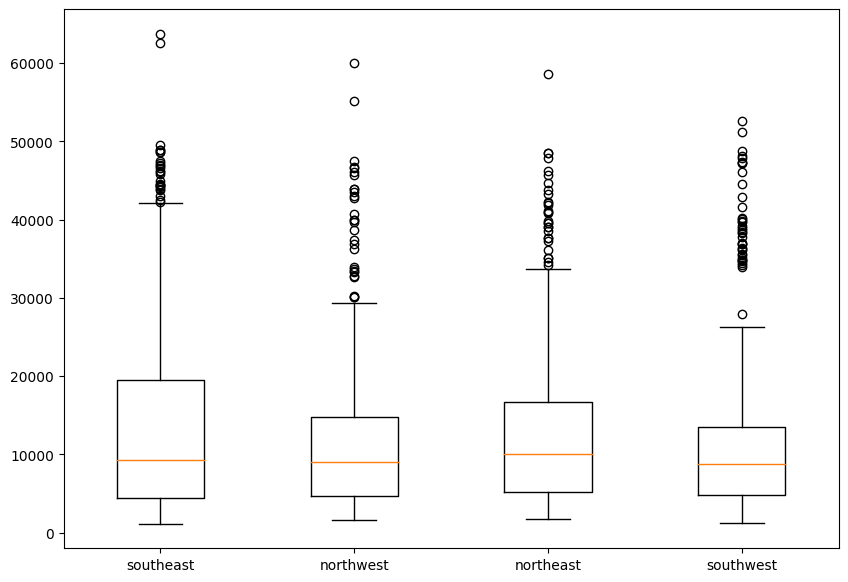

In [12]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(charges_by_region)
_ = ax.set_xticklabels(regions)

## Do insurance costs increase with age

In [13]:
data[0].keys()

dict_keys(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

In [14]:
mean_bmi = mean(dataT['bmi'])
mean_bmi

30.66339686098655

In [33]:
# age_and_charges = sorted([(int(d['age']), float(d['charges'])) for d in data], key=operator.itemgetter(0))
age_and_charges = [(int(d['age']), float(d['charges'])) for d in data]

In [36]:
max(dataT['age'])

64.0

### Results
A quick visual inspection of the graph below reveals that there seems to be three different strata of insurance charges starting at approx. $1000, $1500 and $35000 respectively. The third (highest) band seems to be due to people who smoke, while the second band is probably a mix of some of the other factors like children or bmi.

In all three strata though do indicat the same increase in insurance cost with age. I the case of the first stratum from roughly $1000 at age 18 to rougly $11000 at age 64. The increase isn't quite linear but it's pretty close, so that equates to an increase in cost of approx. $217 per year.


[]

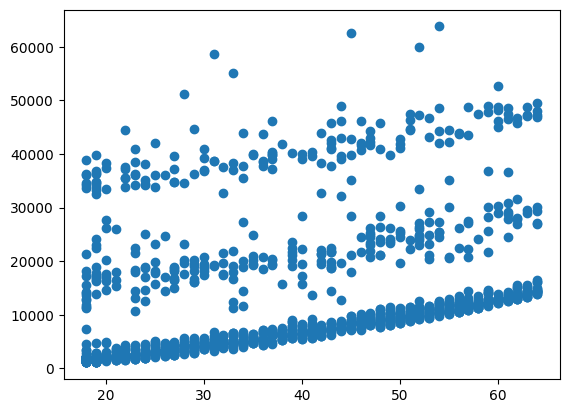

In [34]:
ages, costs = list(zip(*age_and_charges))
plt.scatter(ages, costs)
plt.plot()